In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cluster_mpg.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### The 'name' columns wont be that useful for clustering since its is like a key identifier/primary key

In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [7]:
df_w_dummies = pd.get_dummies(df.drop('name',axis=1))

In [8]:
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


For something like hierarchical clustering, we should use MinMaxScalar and it'll be more clear later on when we actually see the Dendrogram.

MinMaxScaler/Normalization helps a lot when it comes to using Hierarchical clustering which uses the Euclidean distance.

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
scaled_data = scaler.fit_transform(df_w_dummies)

In [12]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

We'll see later on when we actually perform the clustering helps give us an understanding or an idea of what the possible max range could be between two particular data points, now that we have everything between 0 and 1.

Now we'll convert back this from a numpy array to actual DataFrames so that we can visualize this.

In [13]:
scaled_df = pd.DataFrame(scaled_data, columns=df_w_dummies.columns)

In [14]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


#### So we get the exact same data except that now this is scaled down.

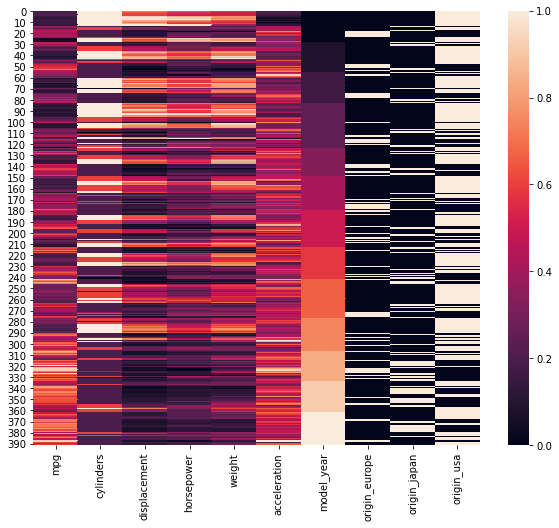

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(scaled_df);

In [16]:
len(scaled_df)

392

We can't directly compare across the feature columns

But let's now try cluster mapping. We have to be careful because when the dataset is too large the program may crash.

<Figure size 720x576 with 0 Axes>

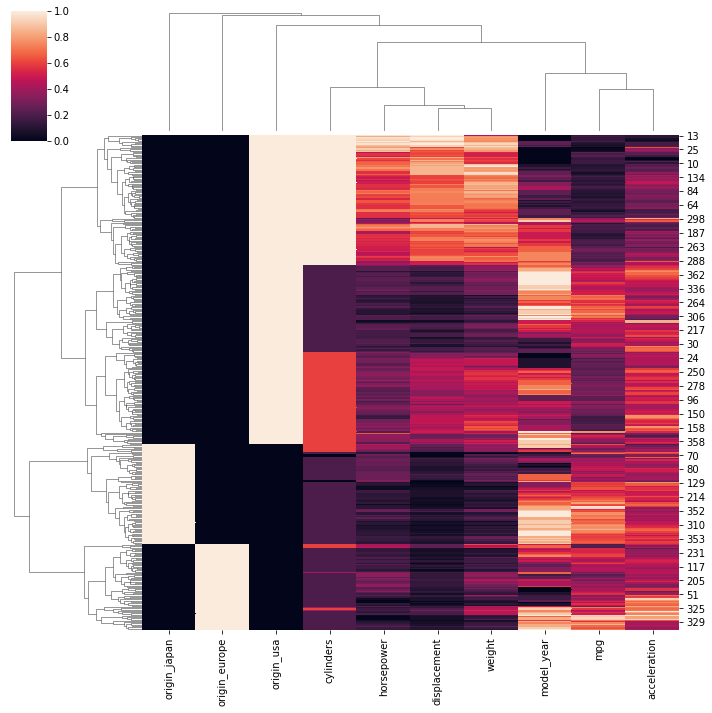

In [17]:
plt.figure(figsize=(10,8))
sns.clustermap(scaled_df);

So when we are thinking about the clustering algorithms, what are we trying to accomplish?

Well, we already know that this data set is a bunch of cars.

And possibly what I'm trying to do is cluster similar cars to each other in groups.

That means since each row represents a car, as car0, car1......

We should be thinking of this as clustering rows, not really clustering columns, because clustering columns is just going to tell me what features are related to each other.

But that's not the true purpose of clustering. 

So We can do this:-

<Figure size 720x576 with 0 Axes>

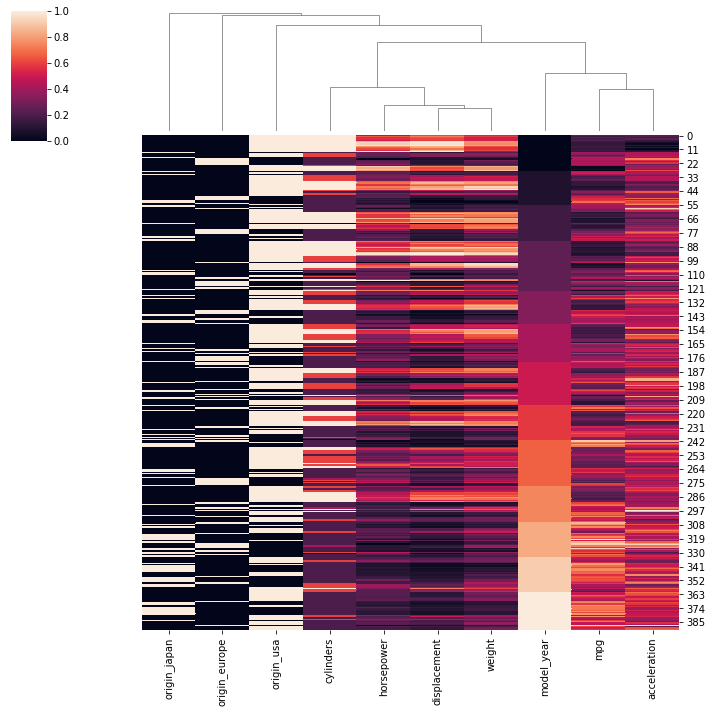

In [18]:
# Clustering by features and not by rows, i.e. keeping row_cluster=False
plt.figure(figsize=(10,8))
sns.clustermap(scaled_df, row_cluster=False);

So the above Clustermap clusters based on similar features.

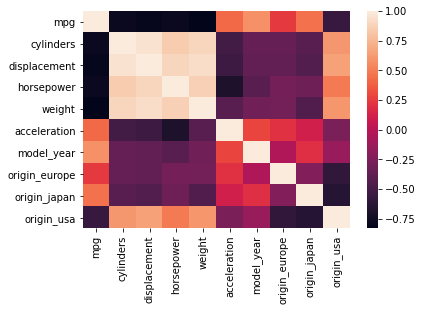

In [19]:
sns.heatmap(scaled_df.corr())

<Figure size 720x576 with 0 Axes>

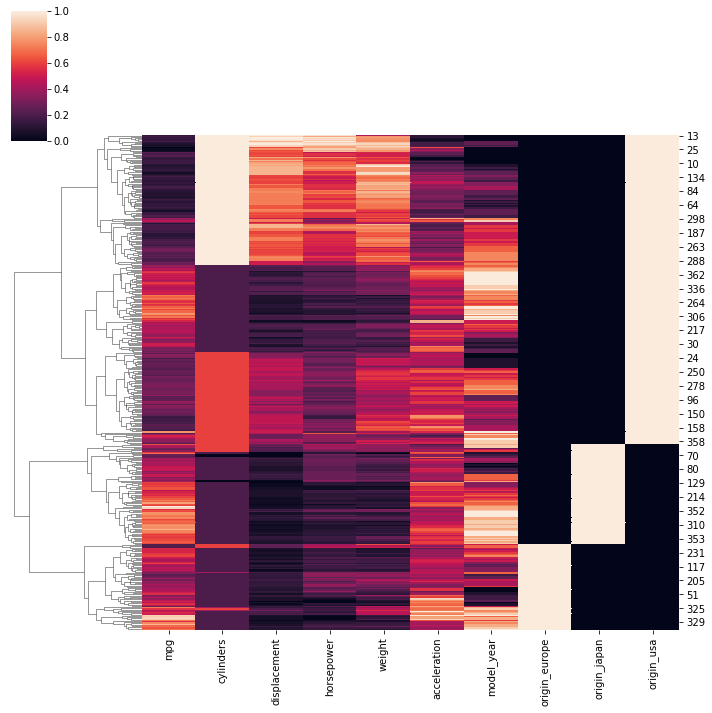

In [20]:
# Clustering by features and not by rows, i.e. keeping row_cluster=False
plt.figure(figsize=(10,8))
sns.clustermap(scaled_df, col_cluster=False);

The above plot is what we are aiming for, where the row_cluster=True and col_cluster=False, essentaially grouping by rows instead of column.

### Also the above diagram is what we call as a Dendrogram.

## Now we'll be focussing on how to use Scikit-learn for Hierarchical clustering.

We'll focus on 2 methodologies:-
1. One is to choose the number of clusters beforehand.
2. Second is use the Dendrogram and the distance threshold in order to have Scikit-learn algorithm to decide/guide you to choose the best no. of clusters.

### 1.Choosing the clusters beforehand

From the dendrogram we can kinda see that we have cluster at a levele where there are 4 clusters, so we'll first use K=4.

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
model = AgglomerativeClustering(n_clusters=4)

In [23]:
# scaled_df

In [24]:
cluster_labels = model.fit_predict(scaled_df)

In [25]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

So we now have 4 labels seperating out the data in 4 clusters.

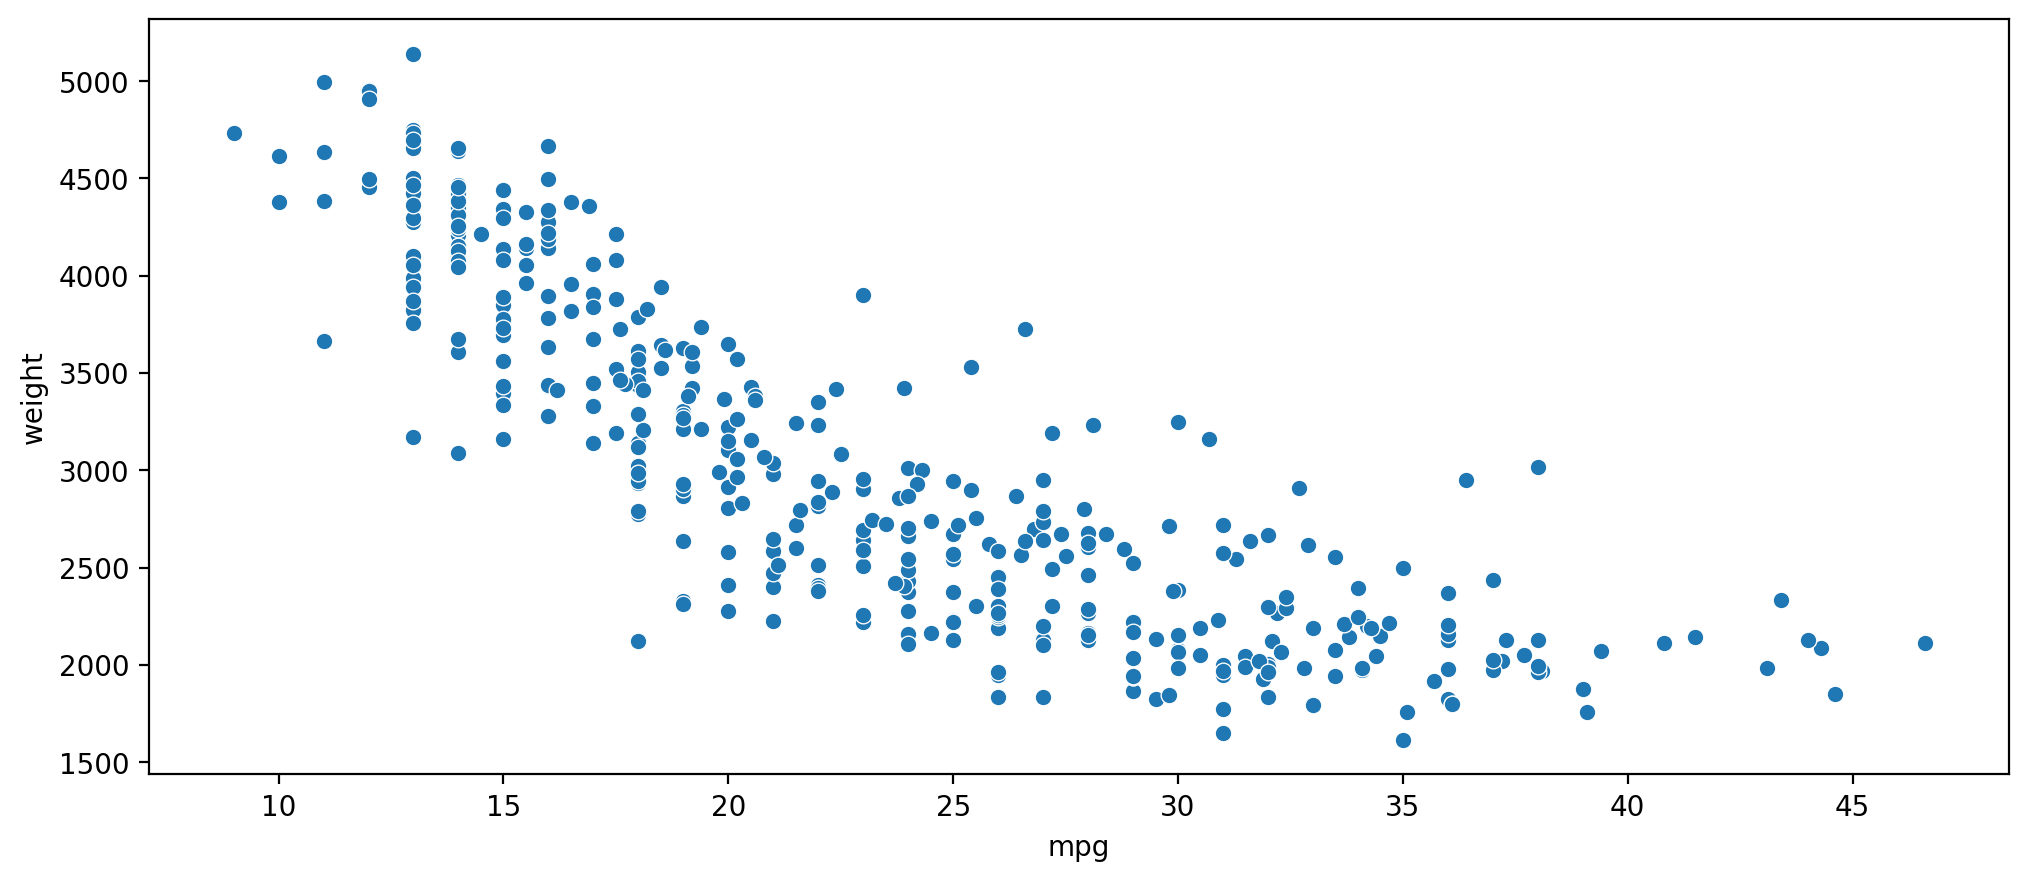

In [26]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight');

But we do have these cluster labels, so we can now add them in as a hue  cluster labels and begin to visualize what these clusters are actually representing.

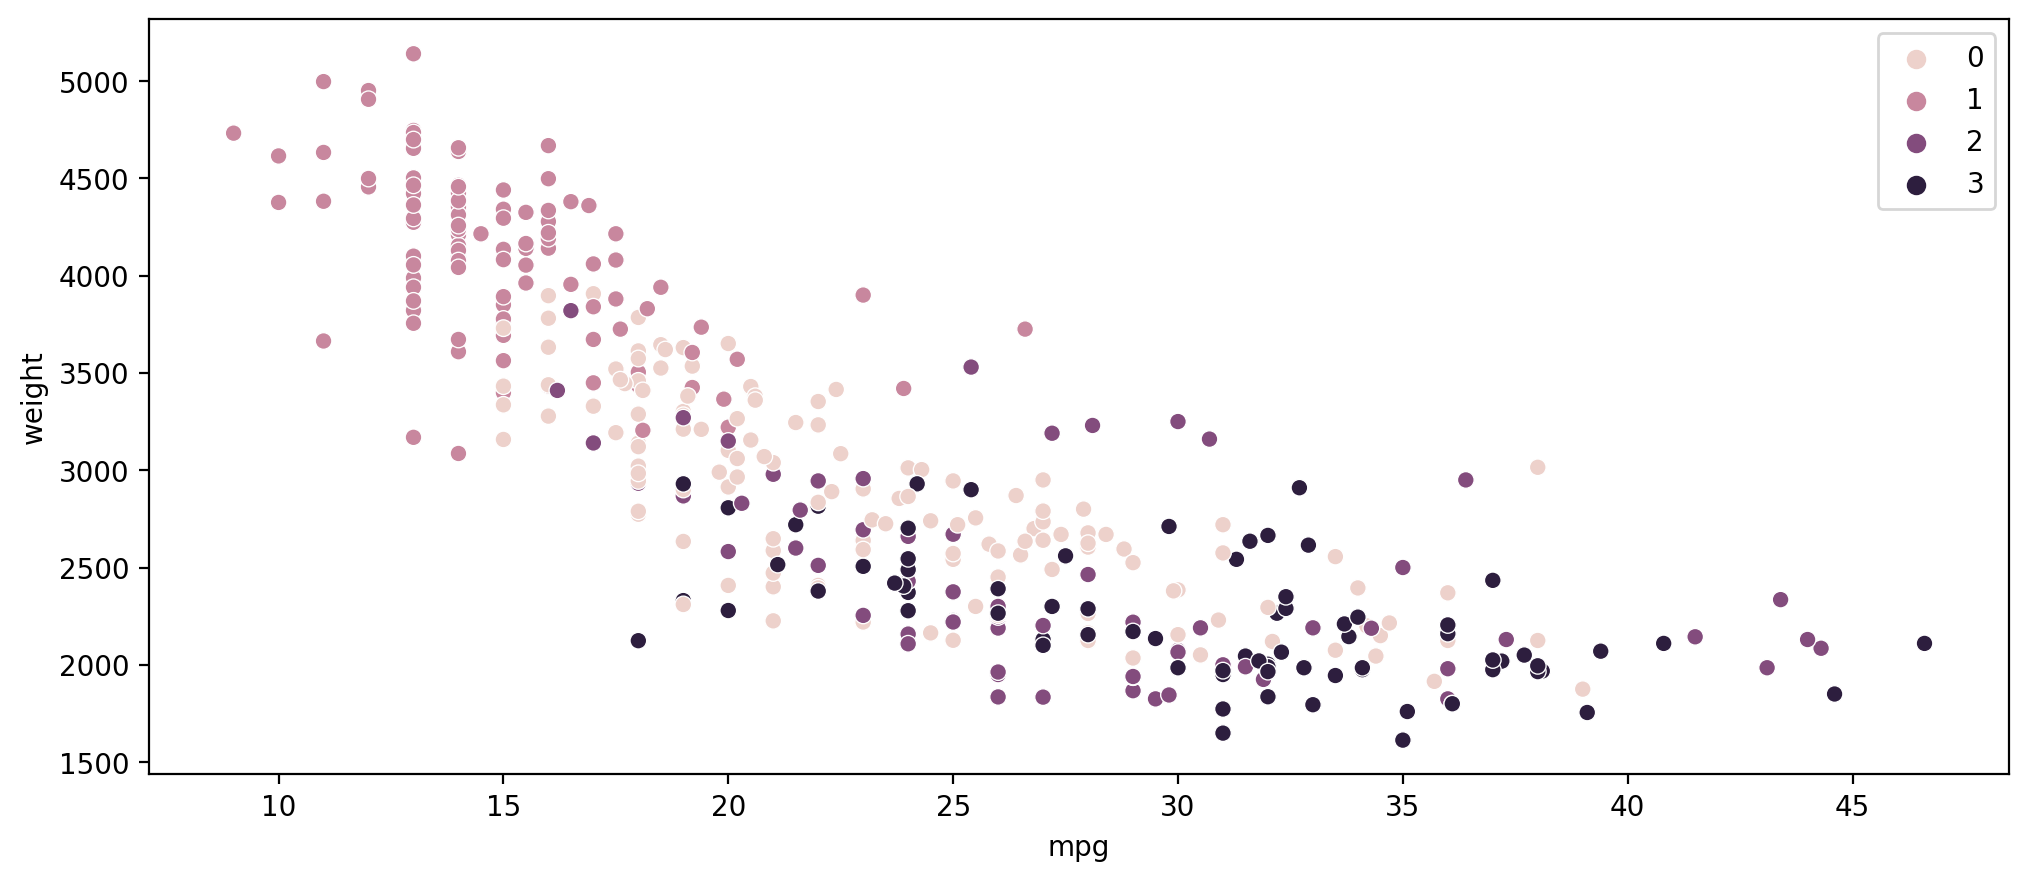

In [27]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight',hue=cluster_labels);

Of course, cluster interpretation is always the hardest part of unsupervised learning when it comes to clustering because there is no correct answer to compare this to.

But we can see the general performance of the algorithm.

So in a similar way we can plot different features against each other based on cluster_labels as hue and see the clustering effect.

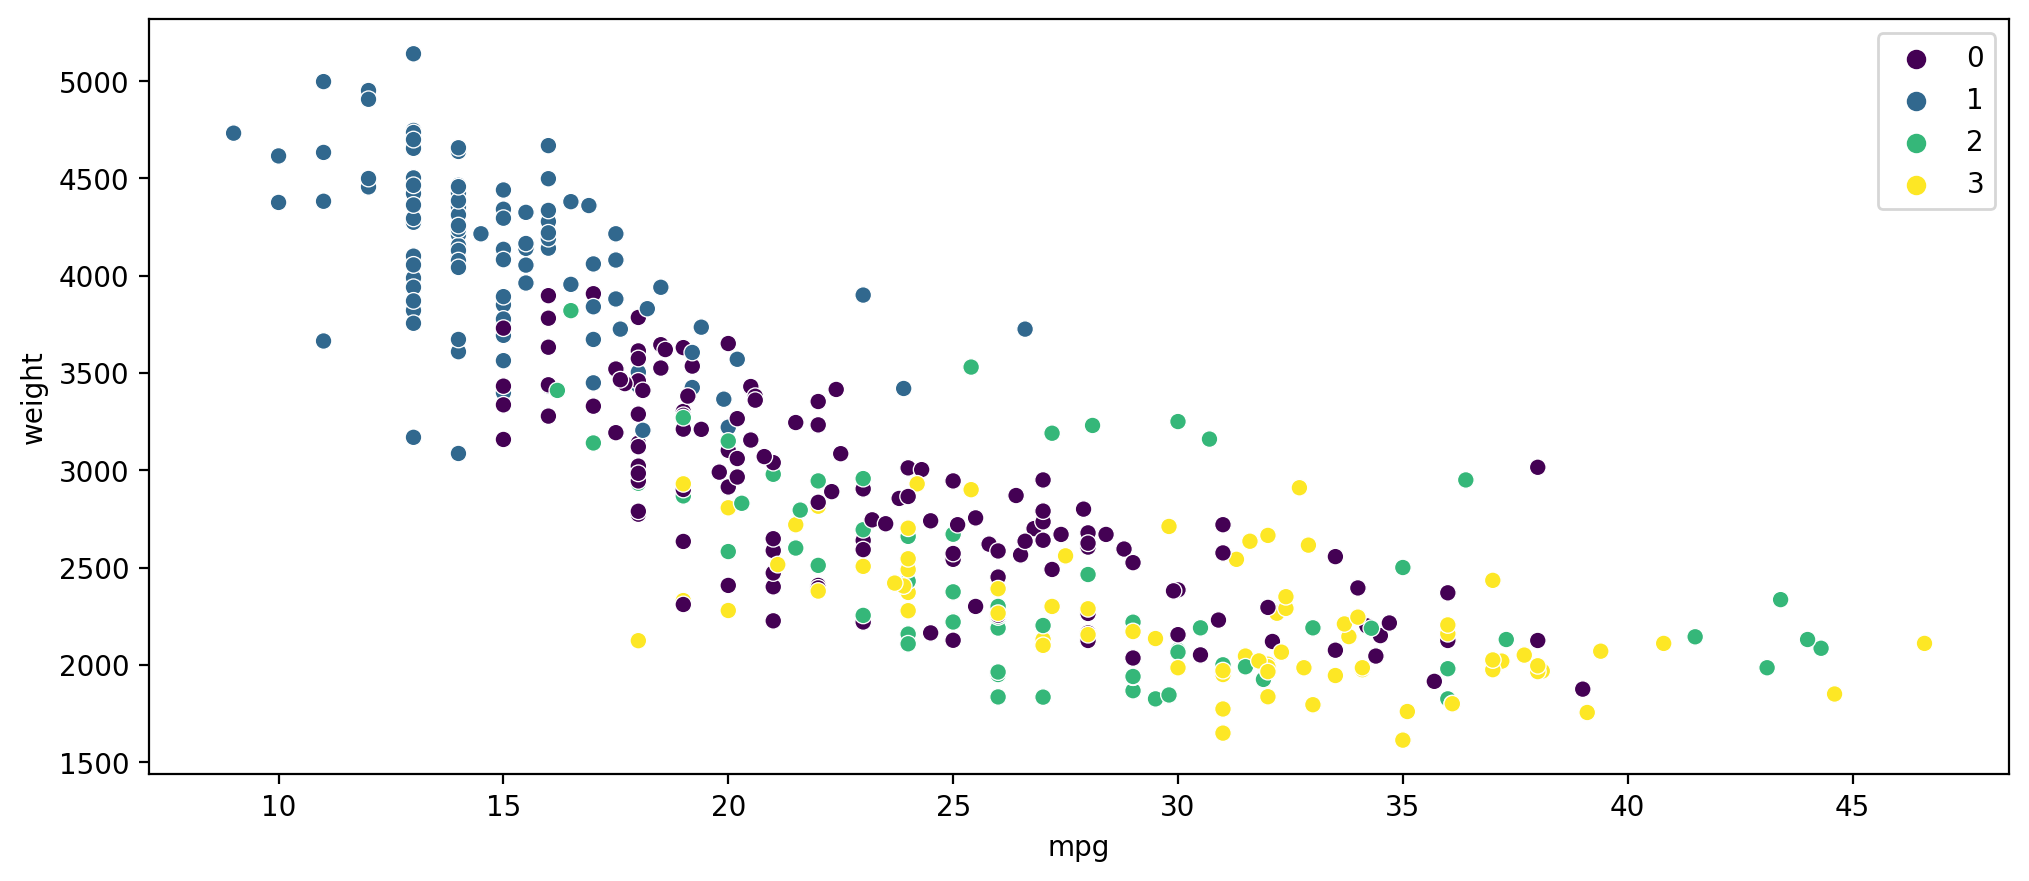

In [28]:
# Changing color
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight',hue=cluster_labels, palette='viridis');

Main problem here is we wouldn't really need to explore too much visually if we already had a good intuition on the number of clusters we were expecting.

----

So instead, we can take advantage of that we have dendrograms to work with.

### 2. Using the Dendrogram and the distance threshold

So before we actually try to able to choose the cluster beforehand, it is imp to understand the hyperparameters ofr this from the documentation.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

1. affinity = Which is essentially the distance , metric we'll be using to compute the linkage/distance between a point and a cluster. the default affinity=euclidean. Other options- manhattan, cosine, etc. default is recommended, as it would be really easy to understand in conjunction with MinMax Scaling.

So when we have two points A and B, what's really nice about MinMax Scaling is that we can immediately understand what the max possible distance could be, as we know after MinMax scaling/normalization all points are going to be b/w 0&1, so the lowest possible distance value is 0 and the max possible value is 1.

So max distance possible?=
sqrt(n_features)

In [29]:
len(scaled_df.columns)

10

In [30]:
np.sqrt(10) # max distance possible between the 2 points given we have MinMax scaling.

3.1622776601683795

So how can we put these info to use?

2. distance_thresholdfloat, default=None :- The linkage distance threshold above which, clusters will not be merged. If not None, n_clusters must be None and compute_full_tree must be True.
So to use thid n_cluster should be None.

In [31]:
# Using distance_threshold=0, note:-max=3.1622
new_model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [32]:
new_labels = new_model.fit_predict(scaled_df)
new_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

Since we are distance_threshold = 0, i.e. we are not counting any distance, the algo is not using any distance so no clusters are formed and hence each single point becomes an individual cluster itself.

Well, we could do is kind of build off this linkage model to build a 10 diagram.

But let's just explore what would happen if we kind of went the extreme way and said every single point is its own cluster.

Scipy has some capabilities for that.

Dendrogram is a visualization function which automatically visualizes for us if you give it a linkage matrix.

Documentation
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [33]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

Create linkage model/matrix:- It's just going to be a matrix showing the two clusters, the distance between them and then their closest cluster assignment.

In [34]:
linkage_matix = hierarchy.linkage(new_model.children_)
linkage_matix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

So the above matrix shows, the first cluster-67, then the second cluster-161, then the distance between them-1.41 and the no. of points b/w them-2.

This is the mathematical info used to plot the dendrogram

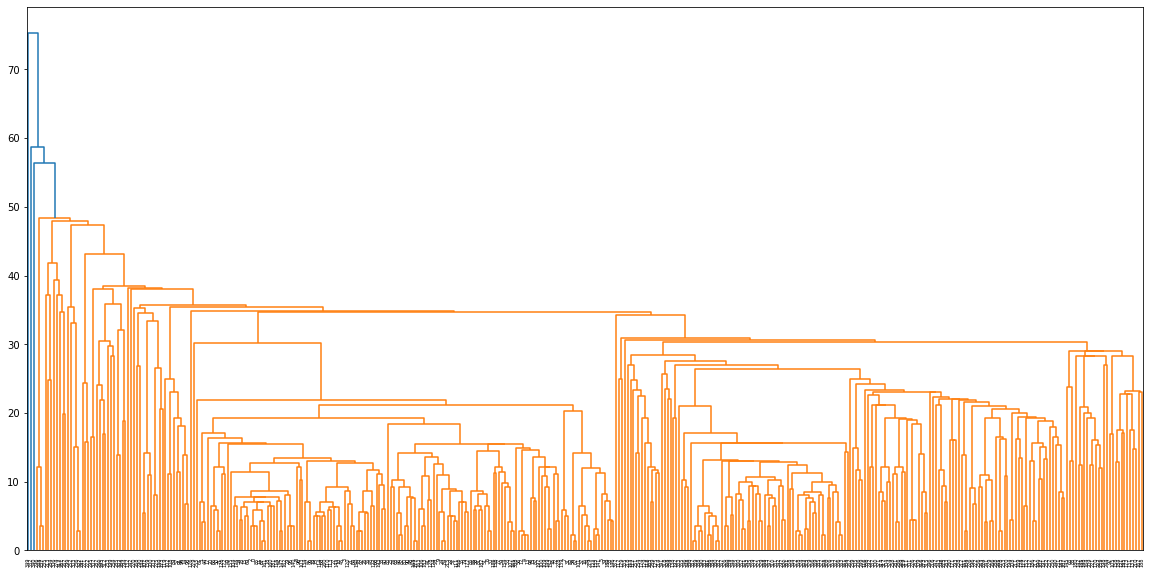

In [35]:
plt.figure(figsize=(20,10))
dendrogram_fig = dendrogram(linkage_matix)

So these are the actual individual cluster points in new_labels being clustered here.

so the for ex the distance 1.41 in the first row in the linkage matrix which is on the y axis between those 2 points 67 & 161 clustered somewhere here in this dendrogram.

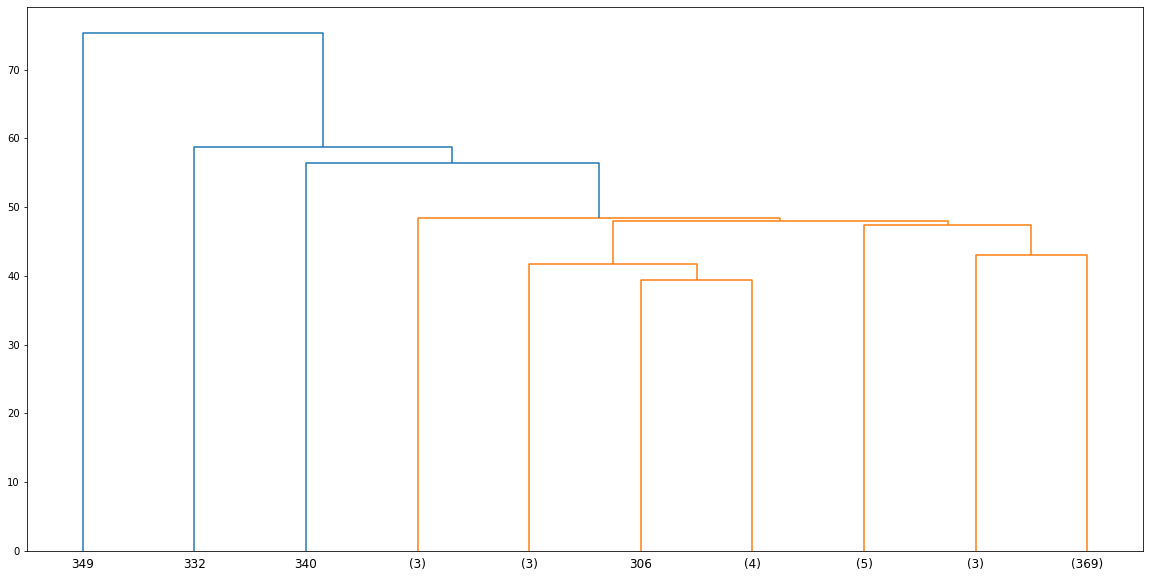

In [36]:
# Cutting off the dendrogram
# 1. Using truncate_mode = 'lastp'
plt.figure(figsize=(20,10))
dendrogram_fig = dendrogram(linkage_matix,truncate_mode='lastp',p=10)

So we have truncated this dendrogram to 10.

As you begin to truncate, you're not really able to interpret the x axis so nicely anymore because this is just referring to the cluster numbers it was giving before, which is no longer linked to what you have in the cluster label inside new_labels.

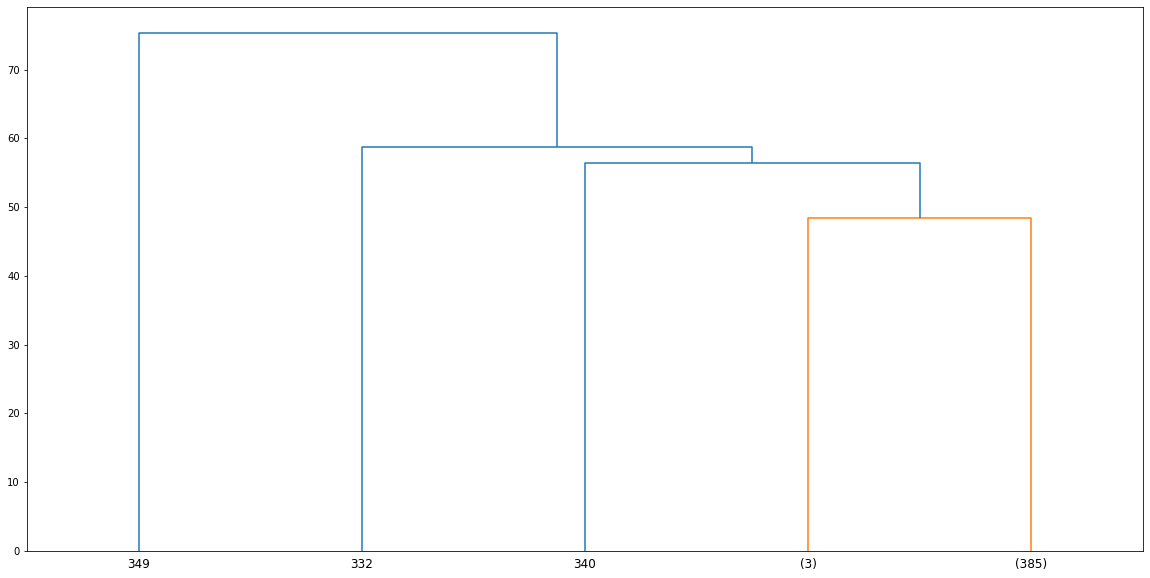

In [37]:
# Cutting off the dendrogram
# 1. Using truncate_mode = 'level'
plt.figure(figsize=(20,10))
dendrogram_fig = dendrogram(linkage_matix,truncate_mode='level',p=3)

No more than given 'p' levels are displayed.

And this would then help us directly choose the clusters.

So those are two truncation modes available in order to guide you and understand what is a reasonable understanding here for our linkage matrix and the dendrogram.

Now if we take a look at the scaled_df

In [38]:
scaled_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.173469,0.201531,0.625000
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.379136,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000,0.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,0.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So all the max values are 1 and all the min values are 0

In [39]:
# So our theoretical max possible euclidean distance
np.sqrt(len(scaled_df.columns))

3.1622776601683795

In [40]:
# Realistic max eucledian distance
# Choose any feature
scaled_df['mpg'].max()

1.0000000000000002

In [41]:
scaled_df['mpg'].idxmax()

320

It is the fact from the dataset that the vehicle at index 320 has the max mp value.

In [42]:
# Min eucledian distance
# Choose aany feature
scaled_df['mpg'].idxmin()

28

And then vehicle at index 28 has the min mpg -miles per galon value.

----

So we know that in our dataset the max distance b/w points is sqrt(10)i.e. 3.1622

But realistically what is the distance b/w the lowest mpg car and highest mpg car after we've used MinMax scaling.

----

To do that we can use Linear algebra with scikit-learn which can automatically calculate the euclidean distance.

In [43]:
car_a = scaled_df.iloc[320] # Max mpg car
car_b = scaled_df.iloc[28] # Min mpg car

In [44]:
euclidean_dist = np.linalg.norm(car_a-car_b)
euclidean_dist

2.3852929970374714

So this is our realistically possible Max euclidean distance value b/w max value mpg car and the min value mpg car, where all thi stime we took mpg becuase it was quiet a heavy differentiator b/w these general cars.

----

Theoretical max euclidean distance = 3.1622

Realistical max euclidean distance = 2.3852

### Note these distance are the distance b/w 2 points and not the actual distance between 2 clusters.

So now that we have the knowledge about he distance, its max and min , it is to say that choosing a threshold of 2-3 would be good

In [46]:
model_n = AgglomerativeClustering(n_clusters=None, distance_threshold=2)

In [47]:
new_cluster_labels = model_n.fit_predict(scaled_df)
new_cluster_labels

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

So now here we can see that how clustering workouts after using the distance threshold as 2.

The model has made 11 cluster(0-10) 

Again we can review the linkage matrix.

In [49]:
linkage_matix_new = hierarchy.linkage(model_n.children_)
linkage_matix_new

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

Essentially everytime it is going to be the same, all that matters is wher you cut off the point.

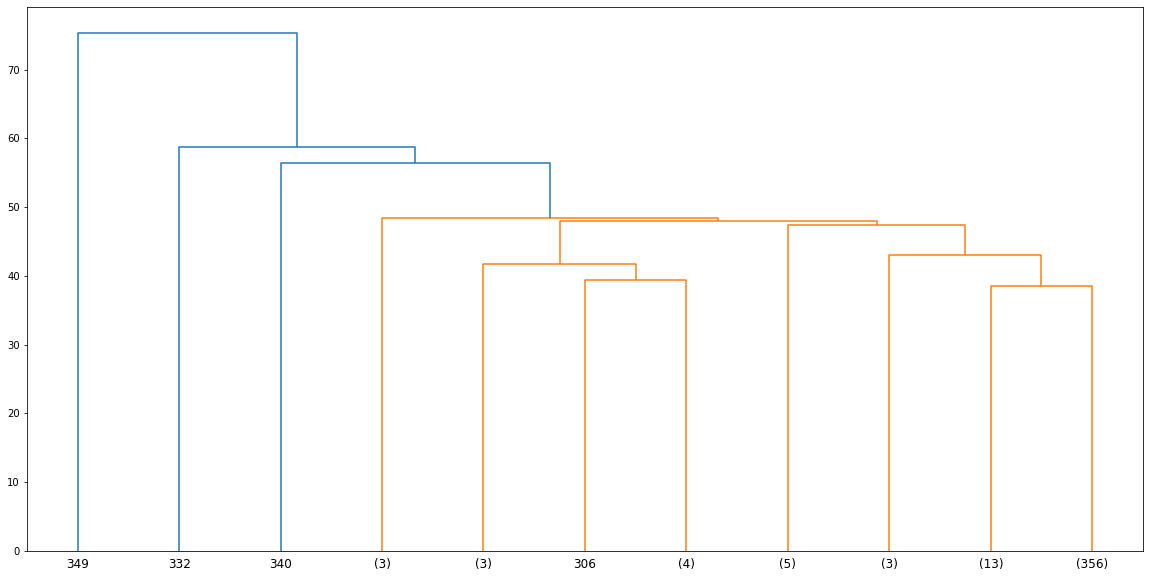

In [50]:
# Cutting off the dendrogram
# 1. Using truncate_mode = 'level'
plt.figure(figsize=(20,10))
dendrogram_fig = dendrogram(linkage_matix,truncate_mode='lastp',p=11)

So this essentially reflects where you decided to cut off your clusters.

So again, this is very exploratory and it's always up to you to decide what these clusters actually represent.

But understanding that Euclidean distance metric, it's going to help you along that diagram, to decide where is a good cutting off point for your particular number of clusters.

-----

And of course, you could instead of using that distance threshold, once you start getting an understanding or an idea, then you can come back and start setting the number of clusters directly instead.